بررسی آماری

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu

In [2]:
file_path=r"C:\Users\Ravis\Desktop\data.csv"
df=pd.read_csv(file_path)
df

,Order ID,Product ID,Sum of Quantity,Sum of Discount
0,AE-2011-9160,OFF-FEL-10001405,2,0.70
1,AE-2011-9160,TEC-EPS-10004171,6,0.70
2,AE-2013-1130,FUR-BUS-10003055,6,0.70
3,AE-2013-1130,OFF-ACC-10004278,1,0.70
4,AE-2013-1530,OFF-STI-10000114,2,0.70
...,...,...,...,...
29994,IT-2013-1083916,OFF-LA-10001676,2,0.00
29995,IT-2013-1083916,OFF-ST-10001195,1,0.10
29996,IT-2013-1083916,OFF-ST-10004046,2,0.10
29997,IT-2013-1083916,OFF-SU-10001886,4,0.00


In [3]:
df["status"]=df["Sum of Discount"].apply(lambda x:"no discount"if x==0 else "has discount")
distribution=pd.pivot_table(
    df,
    index="status",
    columns="Sum of Quantity",
    aggfunc="size",
    fill_value=0


)
distribution

Sum of Quantity,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
status,,,,,,,,,,,,,,,,
has discount,1216,3298,2986,1604,1459,827,707,353,312,68,47,37,30,46,1,0
no discount,2772,4327,3242,2151,1615,993,830,452,330,97,48,63,32,54,1,1


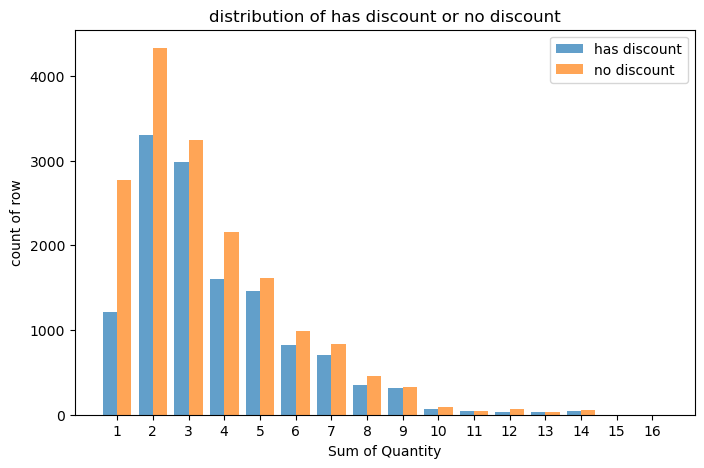

In [4]:
plt.figure(figsize=(8,5))
width = 0.4 

x = np.arange(len(distribution.columns))  

for i, group in enumerate(distribution.index):
    counts = distribution.loc[group].values
    
    plt.bar(x + i*width, counts, width=width, alpha=0.7, label=group)

plt.xticks(x + width/2, distribution.columns)  
plt.xlabel('Sum of Quantity')
plt.ylabel('count of row')
plt.title('distribution of has discount or no discount')
plt.legend()
plt.show()

C:\Users\Ravis\AppData\Local\Temp\ipykernel_1776\780925273.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


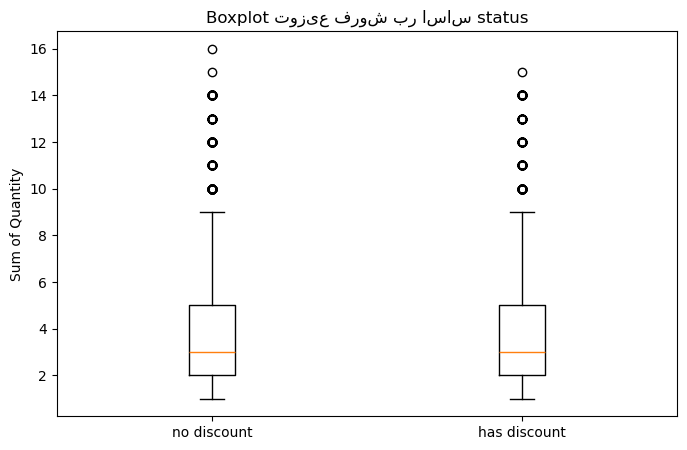

In [30]:
df_long = df[['Sum of Quantity', 'status']]

# رسم boxplot
plt.figure(figsize=(8,5))
plt.boxplot(
    [df_long[df_long['status']=='no discount']['Sum of Quantity'],
     df_long[df_long['status']=='has discount']['Sum of Quantity']],
    labels=['no discount', 'has discount']
)
plt.ylabel('Sum of Quantity')
plt.title('Boxplot توزیع فروش بر اساس status')
plt.show()

In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu

# داده‌ها از Pivot Table
has_discount_counts = [1216, 3298, 2986, 1604, 1459, 827, 707, 353, 312, 68, 47, 37, 30, 46, 1, 0]
no_discount_counts  = [2772, 4327, 3242, 2151, 1615, 993, 830, 452, 330, 97, 48, 63, 32, 54, 1, 1]


quantities = np.arange(1, 17)


has_discount_list = np.repeat(quantities, has_discount_counts)
no_discount_list  = np.repeat(quantities, no_discount_counts)

# آزمون Mann-Whitney U
stat, p_value = mannwhitneyu(has_discount_list, no_discount_list, alternative='two-sided')

print("Mann-Whitney U statistic:", stat)
print("p-value:", p_value)

# نتیجه
if p_value < 0.05:
    print("نتیجه: تفاوت معنی‌دار است. تخفیف روی تعداد فروش تأثیر دارد.")
else:
    print("نتیجه: تفاوت معنی‌دار نیست. تخفیف تأثیر قابل توجهی ندارد.")


Mann-Whitney U statistic: 119490403.0
p-value: 6.814911035215513e-35
نتیجه: تفاوت معنی‌دار است. تخفیف روی تعداد فروش تأثیر دارد.
